## Code for reproducing analysis and figure in paper

**IMPORTANT:** Note all code in this folder is only meant to be used for reproducing analysis in the paper, not for analyzing your own output as there are hard-coded parameters that only makes sense for specific datasets

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

#optional: set the default style for matplotlib
!pip install umap-learn mplscience -Uqqqq
import mplscience
mplscience.available_styles()
mplscience.set_style(reset_current=True)

%reload_ext autoreload
%autoreload 2

['default', 'despine']


In [2]:
import morpheus as mp

# initialize two SpatialDataset Object (modify the path to the data on your machine)
BASE_DIR = "/groups/mthomson/zwang2/IMC/output/hochMelanoma_sz48_pxl3_nc41/replicate"
melanoma_data = mp.SpatialDataset(
    input_path=f"{BASE_DIR}/singlecell.csv",  # path to the single cell data
    cf_dir=f"{BASE_DIR}/cf/c25000kappa70",  # path to the computed perturbations
    model_path=f"/groups/mthomson/zwang2/IMC/output/hochMelanoma_sz48_pxl3_nc41/model/unet/lightning_logs/version_1/checkpoints/epoch=21-step=7106.ckpt",  # path to the trained model
    additional_cols=[
        "Cancer_Stage"
    ],  # additional columns to be loaded from the single cell data
)

BASE_DIR = "/groups/mthomson/zwang2/IMC/output/cedarsLiver_sz48_pxl3_nc44/replicate"
crc_data = mp.SpatialDataset(
    input_path=f"{BASE_DIR}/singlecell.csv",
    cf_dir=f"{BASE_DIR}/cf/paper_num",
    additional_cols=["type", "FLD"],
)

/central/home/zwang2/.cache/pypoetry/virtualenvs/morpheus-spatial-ndDQRg-x-py3.9/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-05-03 17:18:07,509	INFO util.py:154 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


41 channels inferred from input CSV: ['Vimentin', 'CD163', 'B2M', 'CD134', 'CD68', 'GLUT1', 'CD3', 'Lag3', 'PD1', 'CCL4_mRNA', 'CCL18_mRNA', 'HistoneH3', 'CCR2', 'PDL1', 'CXCL8_mRNA', 'CXCL10_mRNA', 'CXCL12_mRNA', 'CXCL13_mRNA', 'CD8', 'CCL2_mRNA', 'CCL22_mRNA', 'CXCL9_mRNA', 'SMA', 'DapB_mRNA', 'SOX10', 'CCL8_mRNA', 'CD31', 'CCL19_mRNA', 'Mart1', 'pRB', 'cleavedPARP', 'DNA1', 'DNA2', 'CK5', 'CD15', 'MPO', 'CD38', 'HLADR', 'S100', 'Cadherin11', 'FAP']
Input path: /groups/mthomson/zwang2/IMC/output/hochMelanoma_sz48_pxl3_nc41/replicate/singlecell.csv
Patch path: /groups/mthomson/zwang2/IMC/output/hochMelanoma_sz48_pxl3_nc41/replicate/patch.h5
Split directory: /groups/mthomson/zwang2/IMC/output/hochMelanoma_sz48_pxl3_nc41/replicate/split
Model path: /groups/mthomson/zwang2/IMC/output/hochMelanoma_sz48_pxl3_nc41/model/unet/lightning_logs/version_1/checkpoints/epoch=21-step=7106.ckpt
Counterfactual directory: /groups/mthomson/zwang2/IMC/output/hochMelanoma_sz48_pxl3_nc41/replicate/cf/c2500

### 1. Visualizing patient-level perturbations

In [3]:
# import relevant functions
from analysis_helper import retrieve_perturbation
from figure_helper import plot_patient_perturbation

##### Melanoma

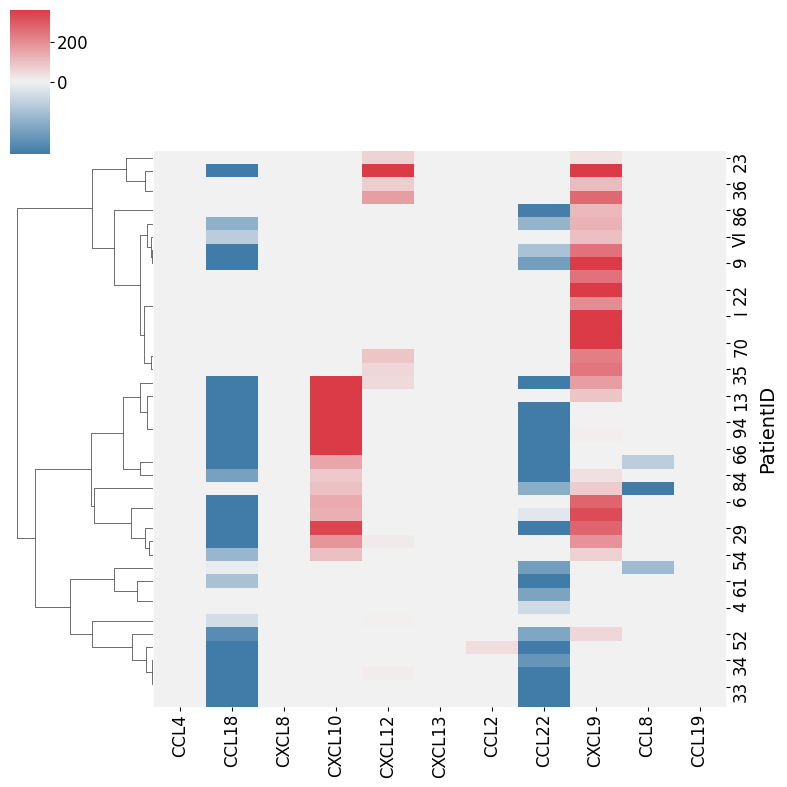

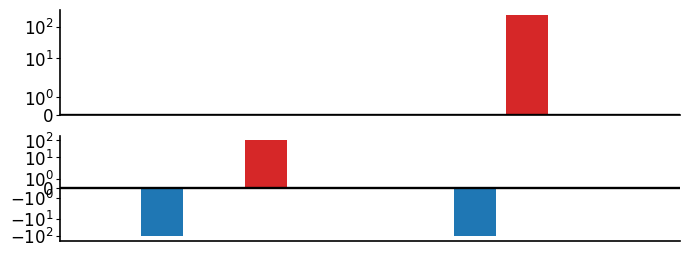

cluster  Cancer_Stage
1        IV              11
         III              5
         unknown          1
2        III             12
         IV              12
         unknown          1
Name: count, dtype: int64


,CCL4_mRNA,CCL18_mRNA,CXCL8_mRNA,CXCL10_mRNA,CXCL12_mRNA,CXCL13_mRNA,CCL2_mRNA,CCL22_mRNA,CXCL9_mRNA,CCL8_mRNA,CCL19_mRNA
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,249.048683,0.0,0.0
1,0.0,-100.0,0.0,97.089066,0.0,0.0,0.0,-100.0,0.000000,0.0,0.0


In [4]:
cf_melanoma, channel_to_perturb_melanoma = retrieve_perturbation(
    melanoma_data, additional_col=["Cancer_Stage"]
)
strategy_melanoma, patient_cf_melanoma = plot_patient_perturbation(
    cf_melanoma,
    channel_to_perturb_melanoma,
    extra_cols=["Cancer_Stage"],
)
display(strategy_melanoma)

##### CRC

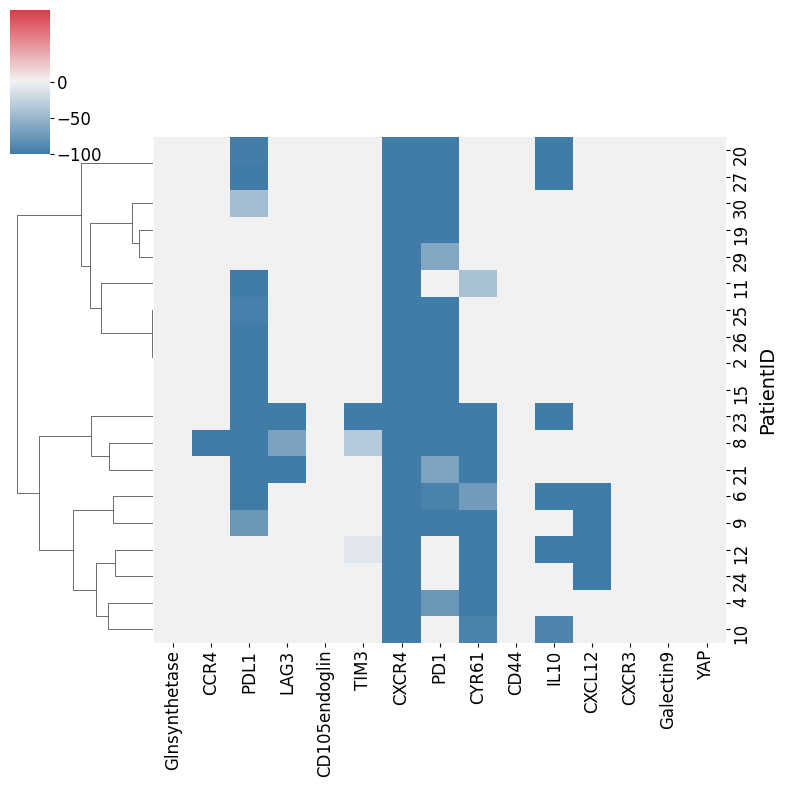

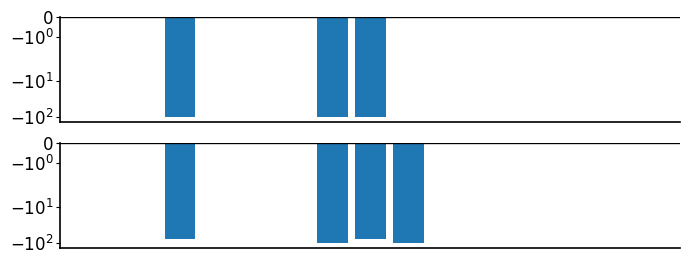

cluster  FLD
1        0.0    3
         1.0    3
         2.0    2
         3.0    2
2        0.0    7
         1.0    1
         3.0    1
Name: count, dtype: int64


,Glnsynthetase,CCR4,PDL1,LAG3,CD105endoglin,TIM3,CXCR4,PD1,CYR61,CD44,IL10,CXCL12,CXCR3,Galectin9,YAP
0,0.0,0.0,-99.175686,0.0,0.0,0.0,-100.0,-100.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,-76.130035,0.0,0.0,0.0,-100.0,-75.908424,-100.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
rel_perturbation, channel_to_perturb = retrieve_perturbation(
    crc_data, additional_col=["type", "FLD"]
)

strategy_crc, patient_cf_crc = plot_patient_perturbation(
    rel_perturbation, channel_to_perturb, extra_cols=["FLD"]
)
display(strategy_crc)

### 2. Assess effectiveness of perturbation on test cohort

In [ ]:
# import relevant functions
from analysis_helper import assess_perturbation
from figure_helper import plot_perturbation_performance

##### Melanoma

In [ ]:
tcell_level_melanoma = assess_perturbation(
    melanoma_data,
    strategy_melanoma,
    data_split="test",
    classify_threshold=0.43,
    additional_col=["Cancer_Stage"],
)
plot_perturbation_performance(
    tcell_level_melanoma,
    patient_phenotype="Cancer_Stage",
    strategy_mapping={
        "strategy_1": "IV",
        "strategy_2": "III",
    },  # mapping of the strategies to the phenotypes
)

##### CRC

In [ ]:
tcell_level_crc = assess_perturbation(
    crc_data,
    strategy_crc,
    data_split="test",
    classify_threshold=0.43,
    additional_col=["FLD", "type"],
)

tcell_level_crc["FLD"] = tcell_level_crc.apply(
    lambda x: 1 if x["FLD"] > 0 else 0, axis=1
)
tcell_level_patient = plot_perturbation_performance(
    tcell_level_crc,
    patient_phenotype="FLD",
    strategy_mapping={"strategy_1": 1, "strategy_2": 0},
)

### 3. Visualizing perturbation vectors in UMAP space

In [6]:
from analysis_helper import get_umap_embeddings
from figure_helper import plot_umap_embedding

In [ ]:
embedding_melanoma, umap_cf_melanoma = get_umap_embeddings(
    melanoma_data, cf_melanoma, channel_to_perturb_melanoma
)
plot_umap_embedding(embedding_melanoma, umap_cf_melanoma)

In [7]:
from analysis_helper import get_data_and_model
import numpy as np
import pandas as pd

In [9]:
# load data and model
X, y, test_metadata = get_data_and_model(
    melanoma_data,
    data_split="train",
    remove_healthy=False,
    remove_small_images=False,
    remove_few_tumor_cells=False,
    data_only=True,
)

# get mean intensity
mean_intensity = np.mean(X, axis=(1, 2))
df = pd.DataFrame(mean_intensity, columns=melanoma_data.channel_names)
df_normalized = np.arcsinh(df.div(df.sum(axis=1), axis=0))

# remove rows that contain NaN or infinite values
valid_rows = np.isfinite(df_normalized).all(axis=1).tolist()
print(f"number of rows removed: {len(df_normalized) - np.array(valid_rows).sum()}")
df_normalized = df_normalized[valid_rows]
y = y[valid_rows]
test_metadata = test_metadata[valid_rows]
df_normalized.index = test_metadata["patch_id"]

Number of tissues filtered out: 0
Number of tissues remaining: 106
number of rows removed: 2473


In [10]:
perturb_df = cf_melanoma[channel_to_perturb_melanoma] / 100 + 1
perturb_df.index = cf_melanoma["patch_id"]
perturbed = df_normalized.loc[perturb_df.index].copy()

assert perturbed.index.equals(perturb_df.index)
assert not perturbed.isnull().values.any()

perturbed[channel_to_perturb_melanoma] = (
    perturb_df * perturbed[channel_to_perturb_melanoma]
)
df_perturbed_normalized = np.arcsinh(perturbed.div(perturbed.sum(axis=1), axis=0))

valid_rows = np.isfinite(df_perturbed_normalized).all(axis=1)
print(f"number of invalid rows removed: {np.sum(~valid_rows)}")

number of invalid rows removed: 0


In [113]:
# combine the embeddings with the labels into one dataframe
embedding_df = pd.DataFrame(embedding, columns=["umap1", "umap2"])
embedding_df["patch_id"] = df_normalized.index
embedding_df = embedding_df.merge(test_metadata, on="patch_id", how="left")

In [114]:
embedding_df

,umap1,umap2,patch_id,ImageNumber,PatientID,PatchIndex_X,PatchIndex_Y,Contains_Tcytotoxic,Contains_Tumor,splits
0,-2.559358,3.698339,2,3,33,0,2,False,True,train
1,-0.687187,0.389699,3,3,33,0,3,False,True,train
2,-2.333259,8.071567,4,3,33,0,4,False,True,train
3,-1.215201,10.407745,5,3,33,0,5,False,True,train
4,2.133206,12.772848,6,3,33,0,6,False,True,train
...,...,...,...,...,...,...,...,...,...,...
37057,3.603098,12.640340,59241,166,94,21,13,False,True,train
37058,2.157460,10.286108,59242,166,94,21,14,False,True,train
37059,10.166045,8.588902,59243,166,94,21,15,False,True,train
37060,9.958350,10.913081,59244,166,94,21,16,False,True,train


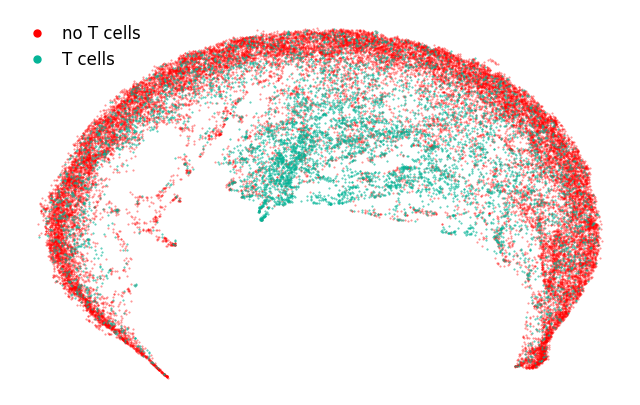

In [30]:
cond1 = (test_metadata["Contains_Tcytotoxic"] == 0) & (
    test_metadata["Contains_Tumor"] == 1
)
cond2 = (test_metadata["Contains_Tcytotoxic"] == 1) & (
    test_metadata["Contains_Tumor"] == 1
)

plt.figure(figsize=(8, 5))

plt.scatter(x=embedding[cond1, 0], y=embedding[cond1, 1], s=0.2, c="#FF0000", alpha=0.5)
plt.scatter(x=embedding[cond2, 0], y=embedding[cond2, 1], s=0.2, c="#04b497", alpha=0.8)

# Create legend with larger markers using proxy artists
legend_elements = [
    mlines.Line2D(
        [0],
        [0],
        color="#FF0000",
        marker="o",
        linestyle="None",
        markersize=5,
        label="no T cells",
    ),
    mlines.Line2D(
        [0],
        [0],
        color="#04b497",
        marker="o",
        linestyle="None",
        markersize=5,
        label="T cells",
    ),
]

plt.legend(handles=legend_elements)

plt.axis("off")  # Turn off the axis
plt.show()

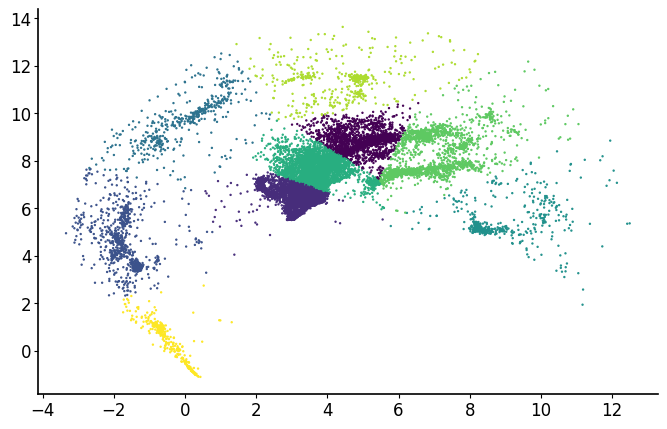

[2459 7528  855  468  951 5839 2245  450  358]


In [93]:
# group the perturbed points into clusters
from sklearn.cluster import KMeans

x = np.array(umap_cf[["perturbed_umap1", "perturbed_umap2"]])
# x = df_perturbed_normalized.to_numpy()

# Create a KMeans object with 2 clusters
ncluster = 9
kmeans = KMeans(n_clusters=ncluster, random_state=0)

# Fit the KMeans object to the data
kmeans.fit(x)

# Get the labels and centroids of the clusters
cluster_labels = kmeans.labels_
centroids = kmeans.cluster_centers_
label_counts = np.bincount(cluster_labels)

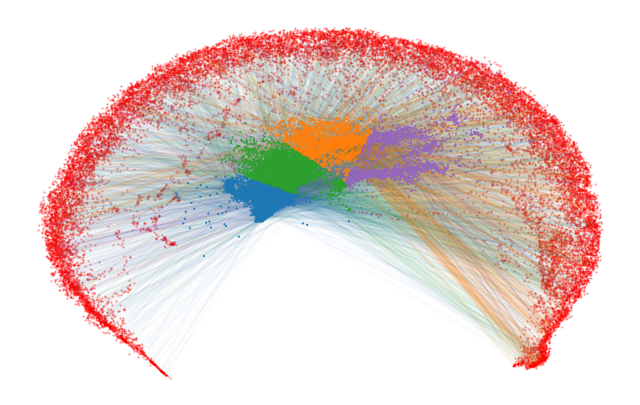

In [94]:
import matplotlib
from matplotlib.cm import get_cmap

plt.figure(figsize=(8, 5))
plt.scatter(
    x=umap_cf["orig_umap1"],
    y=umap_cf["orig_umap2"],
    s=0.2,
    c="#FF0000",
    label="No T cells",
    alpha=0.5,
)

# Draw arrows from each point in dataset 1 to its corresponding point in dataset 2
# Normalize the labels to range from 0 to 1
norm = matplotlib.colors.Normalize(vmin=cluster_labels.min(), vmax=cluster_labels.max())
normalized_labels = norm(cluster_labels)
color_map = [
    "tab:orange",
    "tab:blue",
    "darkgray",
    "darkgray",
    "darkgray",
    "tab:green",
    "tab:purple",
    "darkgray",
    "darkgray",
]

for i in range(0, len(cluster_labels), 4):
    alpha = 0.05
    if cluster_labels[i] in np.argsort(label_counts)[-2:]:
        alpha = 0.025
    elif color_map[cluster_labels[i]] == "tab:orange":
        alpha = 0.08
    elif color_map[cluster_labels[i]] == "darkgray":
        alpha = 0
    elif color_map[cluster_labels[i]] in ["tab:blue", "tab:green"]:
        alpha = 0.8
    plt.arrow(
        umap_cf["orig_umap1"][i],
        umap_cf["orig_umap2"][i],
        umap_cf["perturbed_umap1"][i] - umap_cf["orig_umap1"][i],
        umap_cf["perturbed_umap2"][i] - umap_cf["orig_umap2"][i],
        color=color_map[cluster_labels[i]],
        alpha=alpha,
        head_width=0.01,
        length_includes_head=True,
    )

plt.scatter(
    x=umap_cf["perturbed_umap1"],
    y=umap_cf["perturbed_umap2"],
    s=0.3,
    c=[color_map[ii] for ii in cluster_labels],
    label="Perturbed",
    alpha=[1 if color_map[ii] != "darkgray" else 0 for ii in cluster_labels],
)
plt.axis("off")  # Turn off the axis
plt.show()